# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.052162e+01     6.932217e+00
 * time: 0.0015759468078613281
     1     2.776462e+01     4.320160e+00
 * time: 0.006518125534057617
     2     1.912863e+01     3.703572e+00
 * time: 0.012287139892578125
     3     1.283196e+01     2.914645e+00
 * time: 0.017913103103637695
     4     1.113840e+01     2.566757e+00
 * time: 0.022263050079345703
     5     1.000671e+01     1.963281e+00
 * time: 0.02668309211730957
     6     9.201935e+00     1.178616e+00
 * time: 0.03118109703063965
     7     8.645747e+00     8.949836e-01
 * time: 0.03569293022155762
     8     8.317682e+00     4.573419e-01
 * time: 0.04000210762023926
     9     8.204304e+00     3.353728e-01
 * time: 0.043760061264038086
    10     8.156561e+00     5.968414e-01
 * time: 0.04708504676818848
    11     8.114555e+00     6.233816e-01
 * time: 0.05036807060241699
    12     8.105866e+00     8.683139e-01
 * time: 0.05350995063781738
    13     8.057538e+00     3.728269e-01
 

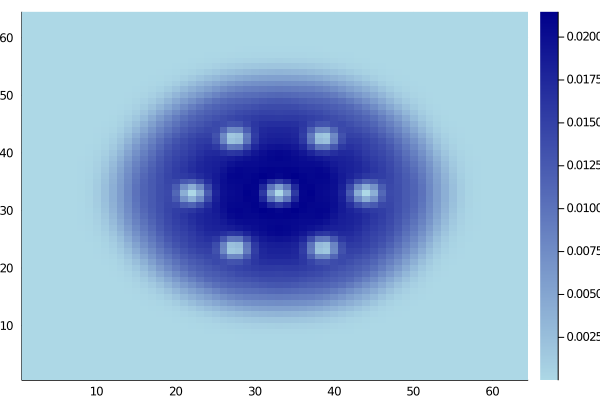

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)